# `LM Tech Hub Data Science Capstone Project 1`

## `By Theophilus Ajevwarue`

## Problem Definition

**Objective**

*To perform data cleaning and draw insight through exploratory data analyis*

**Steps to take**
- Load the data
- Check the shape and basic information of the columns
- Check and deal with duplicates if any
- Check and deal with missing values if any
- Clean values in columns if dirty
- Perform basic descriptive statistics
- Perform correlation analysis
- Perform data exploration and visualization
- Deal with any other thing that may come up

## Data Loading and Preparation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
movies = pd.read_csv("movies.csv")

# Displaying first five items of the data
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
# Checking the shape of the data
movies.shape

(9999, 9)

The data contains 9,999 rows and 9 columns

In [4]:
# Checking basic information of the data columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


From the basic information of the data we can discover the following:
1. There are missing values in some columns
2. Year column is of object datatype
3. Votes column is of object datetype rather than int

## Data Cleaning and Manipulation

In [5]:
# Making a copy of the data for reference purposes
data = movies.copy()

# Displaying random two values of the copied data
data.sample(2)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
8538,The Midnight Gospel,(2020– ),"\nAnimation, Adventure, Comedy",9.2,\nAt a prison for simulated beings suffering f...,"\n Directors:\nPendleton Ward, \nMike L. Ma...",997,24.0,NaN
7395,Tiny Pretty Things,(2020– ),"\nDrama, Mystery, Thriller",6.9,\nA music video audition promises a big break ...,\n Director:\nSamir Rehem\n| \n Stars:\n...,136,NaN,NaN


In [6]:
# Formatting column names to Title case
data.rename(columns = {
    'MOVIES':'Movies', 
    'YEAR':'Year', 
    'GENRE':"Genre", 
    'RATING':"Rating", 
    'ONE-LINE':'Logline', 
    'STARS':'Stars', 
    'VOTES':'Votes'
}, inplace = True)

# Displaying first two items
data.head(2)

,Movies,Year,Genre,Rating,Logline,Stars,Votes,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN


### Examining Movies Column

We'll first start by examining the movies column. This is because the movies in our dataset will serve as unique identifier

In [7]:
# Exploring Movies column
data["Movies"].unique()

array(['Blood Red Sky', 'Masters of the Universe: Revelation',
       'The Walking Dead', ..., ' Totenfrau', ' Arcane',
       ' Heart of Invictus'], dtype=object)

There are some values with trailing white spaces

In [8]:
# Removing white trailing spaces
data["Movies"] = data["Movies"].apply(lambda x: x.strip())

# Displaying unique values
data["Movies"].unique()

array(['Blood Red Sky', 'Masters of the Universe: Revelation',
       'The Walking Dead', ..., 'The Talk', 'Kajko i Kokosz',
       "God's Favorite Idiot"], dtype=object)

In [9]:
# Checking for duplicates
data.duplicated(subset = ["Movies"]).sum()

3576

There are 3,576 duplicates values

In [10]:
# Exploring duplicates
data[data.duplicated()]

,Movies,Year,Genre,Rating,Logline,Stars,Votes,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


From the results above, we see that some sections of the missing values have their values. So before removing duplicates, we'll first fill missing values with reference columns that has the value

In [11]:
data.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'Logline', 'Stars', 'Votes',
       'RunTime', 'Gross'],
      dtype='object')

In [12]:
# Using forward and backward fill from reference columns to fill missing values
data = data.groupby("Movies")[['Movies','Year', 'Genre', 'Rating', 'Logline', 'Stars', 'Votes',
       'RunTime', 'Gross']].ffill().bfill().reset_index(drop = True)

# Checking the nature of duplicates
data[data.duplicated()]

,Movies,Year,Genre,Rating,Logline,Stars,Votes,RunTime,Gross
6832,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.3,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",7,6.0,$4.56M
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.3,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",7,6.0,$4.56M
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,6.0,$4.56M
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,6.0,$4.56M
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,6.0,$4.56M
...,...,...,...,...,...,...,...,...,...
9985,The Last Kingdom,(2015– ),"\nAction, Drama, History",9.4,\nAdd a Plot\n,\n Director:\nPaul Wilmshurst\n| \n Star...,"2,278",55.0,NaN
9988,The Last Kingdom,(2015– ),"\nAction, Drama, History",9.4,\nAdd a Plot\n,\n Director:\nAnthony Philipson\n,"2,278",55.0,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


Missing values successfully filled where there are values in their reference columns.

In [13]:
# Dealing with duplicates
print(f"Shape before duplicates removal {data.shape}\n")

# Removig duplicates by keeping first occurence
data.drop_duplicates(subset = ["Movies"], keep = "first", inplace = True)

# Checking shape after duplicates removed
print(f"Shape after duplicates removal {data.shape}")

Shape before duplicates removal (9999, 9)

Shape after duplicates removal (6423, 9)


Duplicates have been successfully removed. Number of rows dropped from 9,999 to 6,423 after duplicates had been removed.  

In [14]:
# Checking missing values
data.isnull().sum()

Movies     0
Year       0
Genre      0
Rating     0
Logline    0
Stars      0
Votes      0
RunTime    0
Gross      0
dtype: int64

From the above we see that through the referencing of columns, all missing values have been dealt with. 

In [15]:
data.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'Logline', 'Stars', 'Votes',
       'RunTime', 'Gross'],
      dtype='object')

### Examining Year Column

In [16]:
# Exploring Year column
data["Year"].unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [17]:
# Importing libraries to use to clean year column
import re   # For pattern matching
import roman # To deal with Roman numerals

def extract_year(year_str):
    # Removing trailing whitespaces
    year_str = year_str.strip()  

    # Handling roman numeral cases
    if re.match(r'^[XIV]+\s*\(\d{4}\)$', year_str): # This checks for cases like this '(IV) (2013)'
    # Spliting with the opening bracket this gives a list of IV and 2013 and assigns the first value to roman_num and the second to year    
        roman_num, year = year_str.split('(')
        # Using list index to extract the last value which is the year 2013
        year = int(year[:-1])  
        
    # Handling cases with only Roman numerals   
    elif re.match(r'^\([XIV]+\)$', year_str):
        roman_num = year_str.strip("()")
        # Getting the roman numerals value and adding 2000. If the value is XIII it adds 13 to 2000 to return 2013
        year = roman.fromRoman(roman_num) + 2000 
    else:
        # Extracting year from the string
        match = re.search(r'\d{4}', year_str) # This looks for exactly 4 digits
        # Attaching the 4 digits to year variable, but if it's only string it returns "Missing year"
        year = int(match.group()) if match else "Missing Year"

    return year   # Returns the year 

def extract_movie_type(year_str):
    # Removing trailing spaces and brackets
    movie_year = year_str.strip()
    
    # Checking for "-" in movie_year
    if "–" in movie_year:
        return "Series" # If found it's a series
    else: 
        return "Regular" # If not it's regular movies

In [18]:
# Applying the fucntions to the dataset
data["ReleaseYear"] = data["Year"].apply(extract_year)
data["MovieType"] = data["Year"].apply(extract_movie_type)

In [19]:
# Displaying 5 random items
data.sample(5)

,Movies,Year,Genre,Rating,Logline,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType
4116,Cash Only,(2015),"\nCrime, Drama, Thriller",6.1,\nA money troubled man finds some cash in an a...,\n Director:\nMalik Bader\n| \n Stars:\n...,"1,194",91.0,$0.09M,2015,Regular
1026,When We First Met,(2018),"\nComedy, Fantasy, Romance",6.4,\nNoah meets Avery at a Halloween party and fa...,\n Director:\nAri Sandel\n| \n Stars:\nA...,"44,822",97.0,$48.79M,2018,Regular
72,Sex Education,(2019– ),"\nComedy, Drama",8.3,\nA teenage boy with a sex therapist mother te...,"\n \n Stars:\nAsa Butterfield, \...","177,274",45.0,$75.47M,2019,Series
439,The Stranger,(I) (2020),"\nCrime, Drama, Mystery",7.3,\nFollows the lives of suburban families whose...,"\n \n Stars:\nRichard Armitage, ...","38,697",363.0,$100.92M,2020,Regular
6340,Raise the Bar,(2017),"\nAnimation, Short",8.1,"\nSam, a teenage weightlifter striving for the...",\n Director:\nFernanda Frick\n,50,65.0,$4.56M,2017,Regular


In [20]:
# Exploring unique values of ReleaseYear
data["ReleaseYear"].unique()

array([2021, 2010, 2013, 2020, 2006, 2019, 2016, 2011, 2005, 2008, 2017,
       1994, 2014, 2015, 2003, 2009, 2018, 1987, 2012, 2007, 2000, 1993,
       1999, 2001, 1997, 1989, 1975, 1995, 1984, 1998, 1966, 1990, 2002,
       1976, 1978, 2022, 1982, 1968, 2004, 1996, 1971, 1980, 1962, 1960,
       1988, 1969, 1961, 1979, 1956, 1983, 1986, 1967, 1974, 1992, 1958,
       1932, 1941, 1991, 1950, 1981, 1952, 1957, 1954, 1955, 1948, 1947,
       1946, 1977, 2023, 'Missing Year', 1945, 1953, 1985, 1973, 1972,
       1965, 1944, 1933, 1938], dtype=object)

In [21]:
# Checking Missing Year
data[data["ReleaseYear"] == "Missing Year"]

,Movies,Year,Genre,Rating,Logline,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType
3374,An Afternoon with SCTV,(TV Special),\nTalk-Show,7.7,"\nThe legendary cast of SCTV are reunited, rec...",\n Director:\nMartin Scorsese\n| \n Star...,500,65.0,$0.56M,Missing Year,Regular
3462,Chinatown,(TV Movie),"\nDrama, Thriller",7.5,\nTV prequel to the 1974 film 'Chinatown'.,\n,964,121.0,$0.04M,Missing Year,Regular
5040,Untitled Netflix/Chronicles of Narnia TV Movie,(TV Movie),\nFantasy,5.5,\nAdd a Plot\n,\n,239,90.0,$0.12M,Missing Year,Regular
5085,À tombeau ouvert,(TV Movie),"\nAction, Thriller",7.5,\nAdd a Plot\n,\n Director:\nRégis Blondeau\n| \n Stars...,12,71.0,$0.12M,Missing Year,Regular
5086,Untitled Joe Exotic Project,(TV Movie),\nDrama,7.5,\nAdd a Plot\n,\n \n Star:\nRob Lowe\n,12,71.0,$0.12M,Missing Year,Regular
5905,The Hunt for Atlantis,(TV Movie),"\nAction, Adventure",8.7,\nAn eccentric billionaire sends Wilde and Cha...,\n,40,108.0,$0.01M,Missing Year,Regular
5906,Das Privileg,(TV Movie),"\nAnimation, Adventure, Comedy",8.7,\nAdd a Plot\n,"\n Directors:\nFelix Fuchssteiner, \nKathar...",40,108.0,$0.01M,Missing Year,Regular
5912,Line Friends,(TV Movie),"\nAnimation, Comedy, Family",6.6,"\nThe lives of Brown, Cony, Sally, Moon and Ja...",\n,250,90.0,$0.01M,Missing Year,Regular
5913,Free To Be You And Me,(TV Movie),\nFamily,6.6,\nPlot kept under wraps.,\n,250,90.0,$0.01M,Missing Year,Regular
5961,I Take It Black,(TV Movie),\nComedy,5.8,"\nYoung African American Male, by the name of ...","\n \n Stars:\nSam Humphrey, \nSh...",5,120.0,$0.01M,Missing Year,Regular


In [22]:
# Replace Missing Year with Nan
data["ReleaseYear"].replace("Missing Year", np.nan, inplace = True)

# Filling Missing Year using Linear interpolation
data["ReleaseYear"] = data["ReleaseYear"].interpolate(method = "linear")

# Converting Column to int
data["ReleaseYear"] = data["ReleaseYear"].round().astype(int)

# Checking ReleaseYear
data["ReleaseYear"].unique()

array([2021, 2010, 2013, 2020, 2006, 2019, 2016, 2011, 2005, 2008, 2017,
       1994, 2014, 2015, 2003, 2009, 2018, 1987, 2012, 2007, 2000, 1993,
       1999, 2001, 1997, 1989, 1975, 1995, 1984, 1998, 1966, 1990, 2002,
       1976, 1978, 2022, 1982, 1968, 2004, 1996, 1971, 1980, 1962, 1960,
       1988, 1969, 1961, 1979, 1956, 1983, 1986, 1967, 1974, 1992, 1958,
       1932, 1941, 1991, 1950, 1981, 1952, 1957, 1954, 1955, 1948, 1947,
       1946, 1977, 2023, 1945, 1953, 1985, 1973, 1972, 1965, 1944, 1933,
       1938])

In [23]:
# Exploring unqiue values of Movietype
data["MovieType"].unique()

array(['Regular', 'Series'], dtype=object)

In [24]:
# Dropping Year column
data.drop("Year", axis = True, inplace = True)

# Displaying first two items
data.head(2)

,Movies,Genre,Rating,Logline,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType
0,Blood Red Sky,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,$75.47M,2021,Regular
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,$75.47M,2021,Series


### Examing Genre Column

In [25]:
# Exploring the Genre column
data["Genre"].unique()

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Horror            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
     

In [26]:
# Removing \n and extra white spaces
data["Genre"] = data["Genre"].str.replace("\n", "").str.replace(" ", "")

# Displaying unique values
data["Genre"].unique()

array(['Action,Horror,Thriller', 'Animation,Action,Adventure',
       'Drama,Horror,Thriller', 'Animation,Adventure,Comedy',
       'Action,Crime,Horror', 'Action,Crime,Drama', 'Drama,Romance',
       'Crime,Drama,Mystery', 'Comedy', 'Action,Adventure,Thriller',
       'Crime,Drama,Fantasy', 'Drama,Horror,Mystery',
       'Comedy,Drama,Romance', 'Crime,Drama,Thriller', 'Drama',
       'Comedy,Drama', 'Drama,Fantasy,Horror', 'Comedy,Romance',
       'Action,Adventure,Drama', 'Crime,Drama', 'Drama,History,Romance',
       'Horror,Mystery', 'Comedy,Crime', 'Action,Drama,History',
       'Action,Adventure,Crime', 'Action,Adventure,Fantasy',
       'Action,Crime,Mystery', 'Drama,Fantasy,Romance',
       'Drama,Sci-Fi,Thriller', 'Biography,Drama,History',
       'Crime,Thriller', 'Comedy,Crime,Drama', 'Drama,Mystery,Thriller',
       'Action,Adventure,Mystery', 'Action,Comedy', 'Crime,Drama,Horror',
       'Drama,Mystery,Sci-Fi', 'Action,Comedy,Crime', 'Drama,Family',
       'Action,Adventur

In [27]:
# Checking for missing values in Genre
data["Genre"].isnull().any()

False

In [28]:
data.columns

Index(['Movies', 'Genre', 'Rating', 'Logline', 'Stars', 'Votes', 'RunTime',
       'Gross', 'ReleaseYear', 'MovieType'],
      dtype='object')

### Exploring Rating column

In [29]:
# Exploring rating column
data["Rating"].unique()

array([6.1, 5. , 8.2, 9.2, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2, 5.4,
       8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. , 5.8,
       3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 6.4, 9.3,
       7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7, 4.4,
       3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. , 3.4,
       2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8])

In [30]:
data["Rating"].isnull().any()

False

### Checking Logline column

In [31]:
# Exploring logline column
data["Logline"].unique()

array(['\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.',
       '\nThe war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.',
       '\nSheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.',
       ...,
       '\nOn this episode, catch Abhishek Bachchan and Inayat Verma straight up steal our hearts. Find out what advice the little human in the form of a firecracker gives our film industry and how Abish and Abishek bonded over K3G.',
       '\nAfter Sasha moves in with Brian, a mortifying misunderstanding with a therapist forces them to confront their issues with each other.',
       '\nActor Ralph Macchio (Cobra Kai (2018));'], dtype=object)

In [32]:
# Removing \n sequence
data["Logline"] = data["Logline"].str.replace("\n", "")

# Checking the colum
data["Logline"].unique()

array(['A woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.',
       'The war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.',
       'Sheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.',
       ...,
       'On this episode, catch Abhishek Bachchan and Inayat Verma straight up steal our hearts. Find out what advice the little human in the form of a firecracker gives our film industry and how Abish and Abishek bonded over K3G.',
       'After Sasha moves in with Brian, a mortifying misunderstanding with a therapist forces them to confront their issues with each other.',
       'Actor Ralph Macchio (Cobra Kai (2018));'], dtype=object)

In [33]:
# Not really necessary for analysis so will be dropped
data.drop("Logline", axis = 1, inplace = True)

# Checking first two items
data.head(2)

,Movies,Genre,Rating,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType
0,Blood Red Sky,"Action,Horror,Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,$75.47M,2021,Regular
1,Masters of the Universe: Revelation,"Animation,Action,Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,$75.47M,2021,Series


### Exploring Stars Column

In [34]:
# Exploring the stars column
data["Stars"].unique()

array(['\n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n',
       '\n            \n    Stars:\nChris Wood, \nSarah Michelle Gellar, \nLena Headey, \nMark Hamill\n',
       '\n            \n    Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n',
       ...,
       '\n            \n    Stars:\nSharon Osbourne, \nSheryl Underwood, \nCarrie Ann Inaba, \nAmanda Kloots\n',
       '\n    Director:\nMichal Sledzinski\n| \n    Stars:\nArtur Pontek, \nMichal Piela, \nMaciej Kosmala, \nJaroslaw Boberek\n',
       '\n            \n    Stars:\nLeslie Bibb, \nMelissa McCarthy, \nKevin Dunn, \nBen Falcone\n'],
      dtype=object)

The Stars column contains instances where there are:
- Director and Stars with whitespaces and \n
- Director and Star with whitespaces and \n
- Stars with whitespaces and \n
- Star with whitespaces and \n
- only \n

We will extract the names from the stars into a new column called starsdirectors which contains names of stars and directors. for cases of \n only we'll fill with "no value"

In [35]:
def extract_stars_and_directors(text):
    # Using regex to find all names after 'Stars:' or 'Star:'
    stars = re.findall(r'Stars?:\n([^|]+)', text)
    
    # Using regex to find the director's name
    directors = re.findall(r'Director:\n([^\n]+)', text)
    
    # Processing the stars
    if stars:
        stars_list = [name.strip() for name in stars[0].split(',')]
    else:
        stars_list = []
    
    # Processing the directors
    if directors:
        directors_list = [director.strip() for director in directors]
    else:
        directors_list = []
    
    # Combining stars and directors, with stars first, and join them into a single string
    combined_list = stars_list + directors_list
    
    return ', '.join(combined_list)

In [36]:
# Applying function to Stars Column
data["StarsDirectors"] = data["Stars"].apply(extract_stars_and_directors)

# Checking 5 random data
data.sample(5)

,Movies,Genre,Rating,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType,StarsDirectors
2780,Mørke,"Drama,Mystery,Thriller",6.7,\n Director:\nJannik Johansen\n| \n Star...,"3,375",124.0,$0.02M,2005,Regular,"Nikolaj Lie Kaas, Nicolas Bro, Laura Drasbæk, ..."
6146,Rafinha Bastos: Ultimato,Comedy,6.5,"\n Directors:\nRudge Campos, \nJunior Carel...",197,62.0,$0.14M,2018,Regular,Rafinha Bastos
5188,Blazing Transfer Students,"Action,Adventure,Comedy",6.6,"\n \n Stars:\nRyusei Fujii, \nTa...",110,92.0,$0.12M,2017,Regular,"Ryusei Fujii, Takahiro Hamada, Takeshi Kaga, T..."
4782,The Culture High,"Documentary,News",8.2,\n Director:\nBrett Harvey\n| \n Stars:\...,"3,633",120.0,$0.00M,2014,Regular,"Joe Rogan, Snoop Dogg, Ronald Reagan, Wiz Khal..."
3986,My Beautiful Broken Brain,"Documentary,Biography",7.1,"\n Directors:\nSophie Robinson, \nLotje Sod...","2,146",86.0,$0.01M,2014,Regular,"David Lynch, Sophie Robinson, Hente Sodderland..."


In [37]:
# Checking instances of empty names
data[data["StarsDirectors"].str.strip() == ""]

,Movies,Genre,Rating,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType,StarsDirectors
24,He-Man and the Masters of the Universe,"Animation,Action,Adventure",5.0,\n,"4,681",136.0,$75.47M,2021,Series,
1027,Myth & Mogul: John DeLorean,"Documentary,Biography,Crime",7.0,\n,213,89.0,$48.79M,2021,Series,
1380,Love is Blind: After the Altar,Reality-TV,5.4,\n,39,45.0,$0.70M,2021,Series,
1454,Cocaine Cowboys: The Kings of Miami,"Documentary,Crime,History",8.5,\n,"14,082",50.0,$0.45M,2021,Regular,
1644,Sonic Prime,"Animation,Action,Adventure",6.0,\n,"1,621",85.0,$0.03M,2022,Series,
...,...,...,...,...,...,...,...,...,...,...
6466,Flipos,Animation,4.6,\n,28,28.0,$4.56M,2010,Series,
6470,The Kane Chronicles: The Red Pyramid,"Action,Adventure,Drama",7.5,\n,6,90.0,$4.56M,2018,Regular,
6471,The Kane Chronicles: The Throne of Fire,"Action,Adventure,Drama",7.5,\n,6,90.0,$4.56M,2018,Regular,
6472,The Kane Chronicles: The Serpent's Shadow,"Action,Adventure,Drama",7.5,\n,6,90.0,$4.56M,2018,Regular,


344 rows have no values. This is because their initial values were \n.

In [38]:
# Stars with only \n
movies[movies["STARS"] == "\n"].head(2)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
24,He-Man and the Masters of the Universe,(2021– ),"\nAnimation, Action, Adventure",NaN,\nEternia's Prince Adam discovers the power of...,\n,NaN,NaN,NaN
1027,Myth & Mogul: John DeLorean,(2021– ),"\nDocumentary, Biography, Crime",7.0,"\nIn the automotive world, John DeLorean rose ...",\n,213,NaN,NaN


In [39]:
# Replacing empty spaces with "no values"
data["StarsDirectors"] = data["StarsDirectors"].apply(lambda x: "no value" if x.strip() == "" else x)

# Checking instances of empty names
data[data["StarsDirectors"].str.strip() == ""]

,Movies,Genre,Rating,Stars,Votes,RunTime,Gross,ReleaseYear,MovieType,StarsDirectors


In [40]:
data["StarsDirectors"].unique()

array(['Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti, Peter Thorwarth',
       'Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill',
       'Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan',
       ...,
       'Sharon Osbourne, Sheryl Underwood, Carrie Ann Inaba, Amanda Kloots',
       'Artur Pontek, Michal Piela, Maciej Kosmala, Jaroslaw Boberek, Michal Sledzinski',
       'Leslie Bibb, Melissa McCarthy, Kevin Dunn, Ben Falcone'],
      dtype=object)

In [41]:
# Dropping Stars column
data.drop("Stars", axis = 1, inplace = True)

# Displaying first two items of the data
data.head(2)

,Movies,Genre,Rating,Votes,RunTime,Gross,ReleaseYear,MovieType,StarsDirectors
0,Blood Red Sky,"Action,Horror,Thriller",6.1,"21,062",121.0,$75.47M,2021,Regular,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,"Animation,Action,Adventure",5.0,"17,870",25.0,$75.47M,2021,Series,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."


In [42]:
# Checking for presence of missing values
data["StarsDirectors"].isnull().any()

False

### Examining the Votes column

In [43]:
# Exploring the Votes column
data["Votes"].unique()

array(['21,062', '17,870', '885,805', ..., '577', '2,339', '1,195'],
      dtype=object)

In [44]:
# Removing the comma and converting to int
data["Votes"] = data["Votes"].str.replace(",", "").astype(int)

# Checking unique values
data["Votes"].unique()

array([ 21062,  17870, 885805, ...,    577,   2339,   1195])

In [45]:
# Checking for missing values
data["Votes"].isnull().any()

False

In [46]:
data.columns

Index(['Movies', 'Genre', 'Rating', 'Votes', 'RunTime', 'Gross', 'ReleaseYear',
       'MovieType', 'StarsDirectors'],
      dtype='object')

### Examining RunTime Column

In [47]:
# Exploring RunTime column
data["RunTime"].unique()

array([121.,  25.,  44.,  23.,  50., 110.,  53.,  30., 114.,  42., 107.,
        60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,  58.,
        24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,  31.,
       104., 127.,  54.,  88.,  59.,  55., 178.,  16.,  48.,  99., 124.,
       151., 100.,  40., 149., 119.,  20.,  87., 111.,  91., 117., 135.,
       129., 113.,  15.,  85., 169.,  97., 116., 138., 137.,  92., 209.,
       201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145., 128.,
       147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11., 152.,
        94., 133., 298.,  28., 102., 106., 385., 122., 452., 120., 494.,
       240., 134.,  80.,  89.,  35., 216., 296., 143., 164., 386., 363.,
       150., 105., 131.,  65., 103., 126.,  86.,  52., 356., 154., 130.,
       491., 132.,  93.,  82., 370.,  18., 228., 280.,  78., 316., 264.,
        83.,  81., 270., 197., 347., 267.,  37., 230., 233.,  21., 220.,
       331.,  39.,   9., 281.,  10., 557.,  33.,  8

In [48]:
# Renaming column
data.rename(columns = {"RunTime":"RunTime(mins)"}, inplace = True)

# Converting values to int
data["RunTime(mins)"] = data["RunTime(mins)"].astype(int)

# Checking unique values
data["RunTime(mins)"].unique()

array([121,  25,  44,  23,  50, 110,  53,  30, 114,  42, 107,  60,  41,
        49,  51, 109,  22,  43, 136,  46,  45,  58,  24,  70,  64, 148,
       395, 101,  95,  32, 118,  47,  31, 104, 127,  54,  88,  59,  55,
       178,  16,  48,  99, 124, 151, 100,  40, 149, 119,  20,  87, 111,
        91, 117, 135, 129, 113,  15,  85, 169,  97, 116, 138, 137,  92,
       209, 201, 123,  96, 572, 467, 140,  56, 112, 125, 145, 128, 147,
        90,  98,  26, 115, 156, 179, 108,  34,  11, 152,  94, 133, 298,
        28, 102, 106, 385, 122, 452, 120, 494, 240, 134,  80,  89,  35,
       216, 296, 143, 164, 386, 363, 150, 105, 131,  65, 103, 126,  86,
        52, 356, 154, 130, 491, 132,  93,  82, 370,  18, 228, 280,  78,
       316, 264,  83,  81, 270, 197, 347, 267,  37, 230, 233,  21, 220,
       331,  39,   9, 281,  10, 557,  33,  84, 461, 460,  27, 231, 189,
       360, 498, 187,  75, 629, 144, 542, 258, 239, 312, 158, 229, 403,
        57, 142, 313, 306, 358, 139, 300, 436, 374, 203, 160,  2

In [49]:
# Checking for missing values
data["RunTime(mins)"].isnull().any()

False

In [50]:
data.columns

Index(['Movies', 'Genre', 'Rating', 'Votes', 'RunTime(mins)', 'Gross',
       'ReleaseYear', 'MovieType', 'StarsDirectors'],
      dtype='object')

### Exploring Gross column

In [51]:
# Exploring gross column
data["Gross"].unique()

array(['$75.47M', '$402.45M', '$89.22M', '$315.54M', '$57.01M',
       '$260.00M', '$132.38M', '$167.77M', '$404.52M', '$15.07M',
       '$70.10M', '$210.61M', '$327.48M', '$390.53M', '$303.00M',
       '$56.63M', '$58.06M', '$353.01M', '$46.89M', '$7.00M', '$377.85M',
       '$107.83M', '$403.71M', '$316.83M', '$100.55M', '$28.26M',
       '$188.76M', '$213.52M', '$226.01M', '$408.08M', '$10.06M',
       '$14.84M', '$168.05M', '$183.64M', '$342.55M', '$96.52M',
       '$140.22M', '$172.56M', '$56.95M', '$330.36M', '$17.80M', '$0.20M',
       '$56.82M', '$66.21M', '$75.61M', '$4.56M', '$106.58M', '$5.02M',
       '$22.68M', '$102.92M', '$110.52M', '$504.01M', '$26.86M', '$2.00M',
       '$32.73M', '$33.80M', '$400.74M', '$19.02M', '$36.26M', '$6.67M',
       '$45.51M', '$75.66M', '$0.33M', '$4.00M', '$20.16M', '$95.86M',
       '$176.48M', '$126.66M', '$80.10M', '$42.34M', '$0.04M', '$4.71M',
       '$117.72M', '$229.09M', '$33.70M', '$97.69M', '$21.15M', '$27.85M',
       '$25.02M', '

In [52]:
# Removing dollars, multiplying values by 1 million and round to 2 decimal places
data["Gross"] = data["Gross"].apply(lambda x: round(float(x.lower().lstrip("$").rstrip("m")) * 1_000_000, 2))

# Renaming Gross
data.rename(columns = {"Gross": "Gross($)"}, inplace = True)

# Checking Gross
data["Gross($)"].unique()

array([7.5470e+07, 4.0245e+08, 8.9220e+07, 3.1554e+08, 5.7010e+07,
       2.6000e+08, 1.3238e+08, 1.6777e+08, 4.0452e+08, 1.5070e+07,
       7.0100e+07, 2.1061e+08, 3.2748e+08, 3.9053e+08, 3.0300e+08,
       5.6630e+07, 5.8060e+07, 3.5301e+08, 4.6890e+07, 7.0000e+06,
       3.7785e+08, 1.0783e+08, 4.0371e+08, 3.1683e+08, 1.0055e+08,
       2.8260e+07, 1.8876e+08, 2.1352e+08, 2.2601e+08, 4.0808e+08,
       1.0060e+07, 1.4840e+07, 1.6805e+08, 1.8364e+08, 3.4255e+08,
       9.6520e+07, 1.4022e+08, 1.7256e+08, 5.6950e+07, 3.3036e+08,
       1.7800e+07, 2.0000e+05, 5.6820e+07, 6.6210e+07, 7.5610e+07,
       4.5600e+06, 1.0658e+08, 5.0200e+06, 2.2680e+07, 1.0292e+08,
       1.1052e+08, 5.0401e+08, 2.6860e+07, 2.0000e+06, 3.2730e+07,
       3.3800e+07, 4.0074e+08, 1.9020e+07, 3.6260e+07, 6.6700e+06,
       4.5510e+07, 7.5660e+07, 3.3000e+05, 4.0000e+06, 2.0160e+07,
       9.5860e+07, 1.7648e+08, 1.2666e+08, 8.0100e+07, 4.2340e+07,
       4.0000e+04, 4.7100e+06, 1.1772e+08, 2.2909e+08, 3.3700e

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 9602
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movies          6423 non-null   object 
 1   Genre           6423 non-null   object 
 2   Rating          6423 non-null   float64
 3   Votes           6423 non-null   int32  
 4   RunTime(mins)   6423 non-null   int32  
 5   Gross($)        6423 non-null   float64
 6   ReleaseYear     6423 non-null   int32  
 7   MovieType       6423 non-null   object 
 8   StarsDirectors  6423 non-null   object 
dtypes: float64(2), int32(3), object(4)
memory usage: 426.5+ KB


## Data Exploration and Visualization

### Basic Descriptive Statistics

In [54]:
# Basic statistics of numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,6423.0,6.569080e+00,1.221651e+00,1.1,5.8,6.7,7.4,9.4
Votes,6423.0,1.946892e+04,7.913317e+04,5.0,291.5,1357.0,6349.5,1713028.0
RunTime(mins),6423.0,7.941632e+01,4.793773e+01,1.0,49.0,84.0,100.0,853.0
Gross($),6423.0,1.716489e+07,5.138697e+07,0.0,20000.0,150000.0,4560000.0,504010000.0
ReleaseYear,6423.0,2.015307e+03,8.176381e+00,1932.0,2014.0,2017.0,2019.0,2023.0


From the descriptive statistics we can observe the following:

- Gross have some zero values and there's a large spread in the datapoints
- Like Gross the spread between the values in votes are large. 

In [55]:
# Basic statistics of categorical variables
data.astype("category").describe()

,Movies,Genre,Rating,Votes,RunTime(mins),Gross($),ReleaseYear,MovieType,StarsDirectors
count,6423,6423,6423.0,6423,6423,6423.0,6423,6423,6423
unique,6423,509,77.0,3752,261,331.0,78,2,6002
top,#AnneFrank - Parallel Stories,Comedy,7.2,16,60,10000.0,2020,Regular,no value
freq,1,684,246.0,29,337,868.0,833,4557,344


### Correlation Analysis

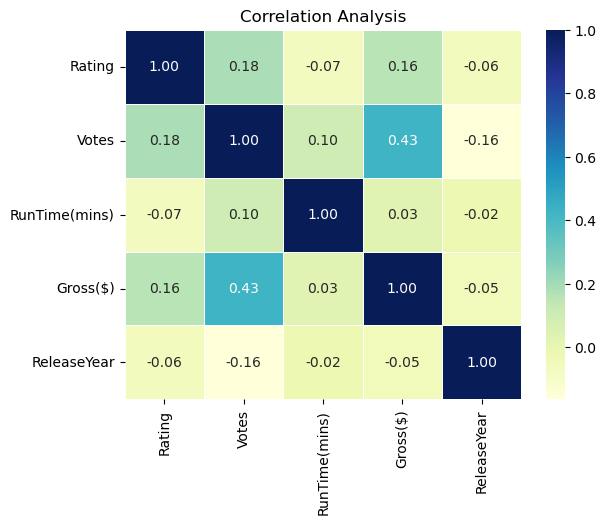

In [56]:
# Correlation matrix
corr_matrix = data.corr(numeric_only= True)

# Visualizing correlation matrix
sns.heatmap(corr_matrix,
           annot = True,
           linewidths= 0.5,
           fmt = ".2f",
           cmap = "YlGnBu")
plt.title("Correlation Analysis");

***The strongest correlation are between Votes and Gross with a positive correlation (0.43). Which an increase in one variable is likely going to result in corresponding increase in the other and vice versa.***

***The weakest correlation is between Release Year and Run Time(mins). At -0.02 it's too weak to assume any correlation and the the negative sign means as one variable goes up the other is likely to go down.***

### Relationship and Distribution of Data

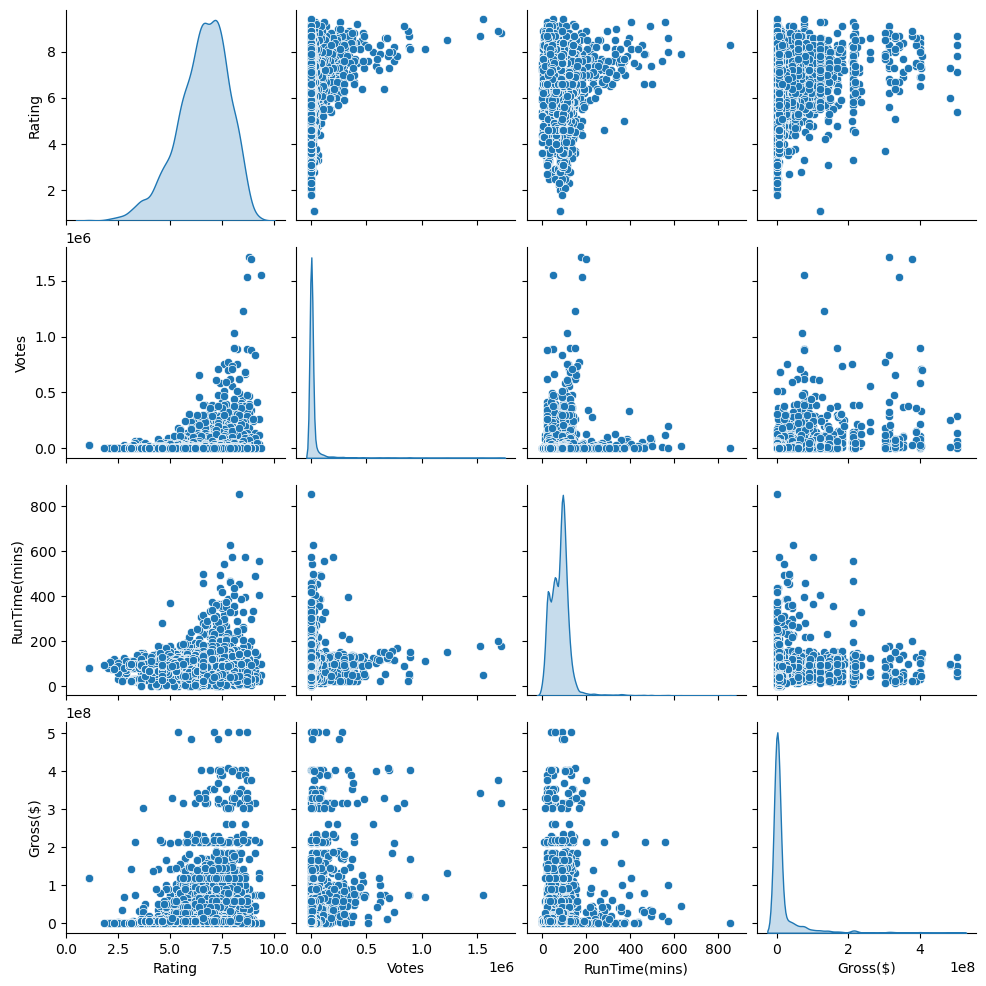

In [57]:
# Checking distribution of numerical variables
sns.pairplot(data, vars=['Rating', 'Votes', 'RunTime(mins)', 'Gross($)'], diag_kind='kde')
plt.show()

***Of all the variables, only Rating has a normal distribution.***

### 1. Top 10 Longest Movies

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 9602
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movies          6423 non-null   object 
 1   Genre           6423 non-null   object 
 2   Rating          6423 non-null   float64
 3   Votes           6423 non-null   int32  
 4   RunTime(mins)   6423 non-null   int32  
 5   Gross($)        6423 non-null   float64
 6   ReleaseYear     6423 non-null   int32  
 7   MovieType       6423 non-null   object 
 8   StarsDirectors  6423 non-null   object 
dtypes: float64(2), int32(3), object(4)
memory usage: 426.5+ KB


In [59]:
# Extracting Longest Movies
movies_duration = data[["Movies", "RunTime(mins)"]].sort_values(by = "RunTime(mins)", ascending = False)

# Extracting top 10 longest movies
longest_movies = movies_duration.head(10)

# Displaying the longest movies
longest_movies

,Movies,RunTime(mins)
1902,El tiempo entre costuras,853
1081,Soupçons,629
2498,The Innocence Files,573
201,The Haunting of Hill House,572
820,Cosmos: A Spacetime Odyssey,557
1127,Dogs of Berlin,542
967,Away,498
352,The Haunting of Bly Manor,494
514,The Last Dance,491
207,El inocente,467


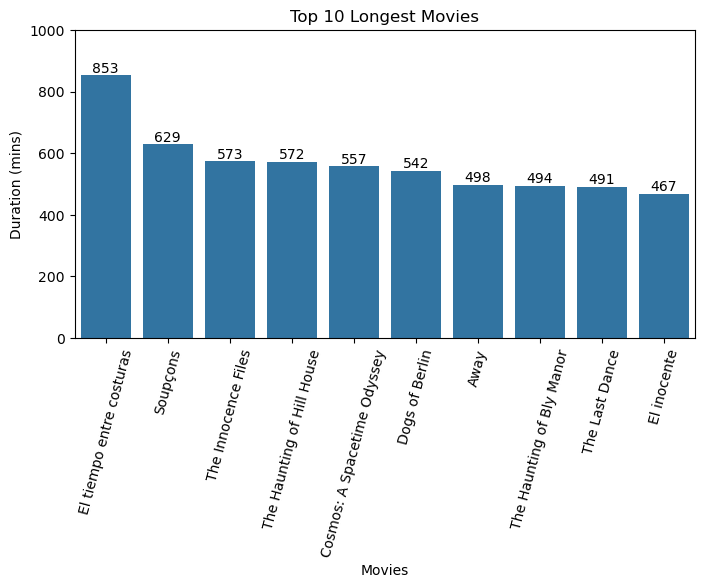

In [60]:
# Visualizing the top 10 longest movies
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(x = longest_movies["Movies"], y = longest_movies["RunTime(mins)"])
ax.set(title = "Top 10 Longest Movies",
      xlabel = "Movies",
      ylabel = "Duration (mins)")
ax.set_ylim((0, 1000))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 75);

***From the above, we see that "El tiempo entre costuras" is the longest movie with a runtime of 853 minutes while "El inocente" is the tenth longest movie with a runtime of 467.***

### 2. Top 10 Stars/Directors

In [61]:
# Exploring the StarsDirectors column
data["StarsDirectors"].unique()

array(['Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti, Peter Thorwarth',
       'Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill',
       'Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan',
       ...,
       'Sharon Osbourne, Sheryl Underwood, Carrie Ann Inaba, Amanda Kloots',
       'Artur Pontek, Michal Piela, Maciej Kosmala, Jaroslaw Boberek, Michal Sledzinski',
       'Leslie Bibb, Melissa McCarthy, Kevin Dunn, Ben Falcone'],
      dtype=object)

In [62]:
# Extracting the top stars/directors, excluding data with no names
top_stars = data[data["StarsDirectors"] != "no value"]["StarsDirectors"].str.split(", ").explode().value_counts().head(10)

top_stars

Johnny Yong Bosch    19
Jakob Eklund         18
Kana Hanazawa        16
Jay Karas            16
Marcus Raboy         15
Adam Sandler         14
Jay Chapman          14
Ashleigh Ball        14
John Cleese          13
Dave Chappelle       13
Name: StarsDirectors, dtype: int64

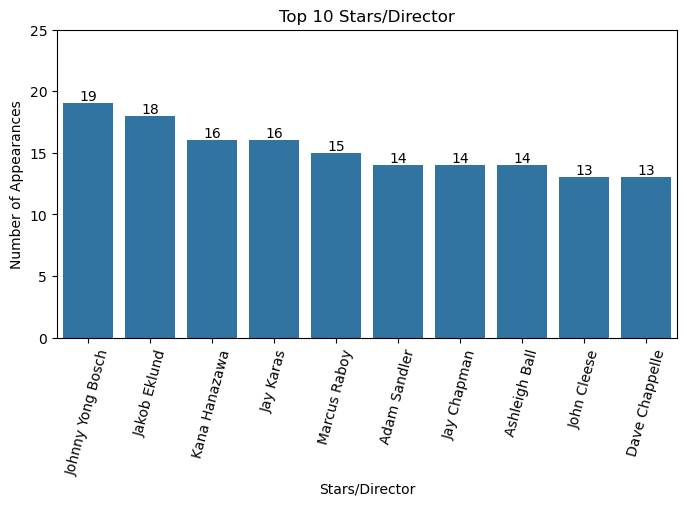

In [63]:
# Visualizing the top 10 Stars/Director
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(x = top_stars.index, y = top_stars)
ax.set(title = "Top 10 Stars/Director",
      xlabel = "Stars/Director",
      ylabel = "Number of Appearances")
ax.set_ylim((0, 25))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 75);

***From the data, Johnny Yong Bosch is the Star with the most appearance (19)***

### 3. Top 5 Genres

In [64]:
# Exploring Genre
data["Genre"].unique()

array(['Action,Horror,Thriller', 'Animation,Action,Adventure',
       'Drama,Horror,Thriller', 'Animation,Adventure,Comedy',
       'Action,Crime,Horror', 'Action,Crime,Drama', 'Drama,Romance',
       'Crime,Drama,Mystery', 'Comedy', 'Action,Adventure,Thriller',
       'Crime,Drama,Fantasy', 'Drama,Horror,Mystery',
       'Comedy,Drama,Romance', 'Crime,Drama,Thriller', 'Drama',
       'Comedy,Drama', 'Drama,Fantasy,Horror', 'Comedy,Romance',
       'Action,Adventure,Drama', 'Crime,Drama', 'Drama,History,Romance',
       'Horror,Mystery', 'Comedy,Crime', 'Action,Drama,History',
       'Action,Adventure,Crime', 'Action,Adventure,Fantasy',
       'Action,Crime,Mystery', 'Drama,Fantasy,Romance',
       'Drama,Sci-Fi,Thriller', 'Biography,Drama,History',
       'Crime,Thriller', 'Comedy,Crime,Drama', 'Drama,Mystery,Thriller',
       'Action,Adventure,Mystery', 'Action,Comedy', 'Crime,Drama,Horror',
       'Drama,Mystery,Sci-Fi', 'Action,Comedy,Crime', 'Drama,Family',
       'Action,Adventur

In [65]:
# Extracting top 5 genre
top_genre = data["Genre"].str.split(",").explode().value_counts(normalize = True).head()

# Extracting their percentage
top_genre = round(top_genre * 100)

top_genre

Drama          19.0
Comedy         15.0
Action          8.0
Documentary     7.0
Animation       6.0
Name: Genre, dtype: float64

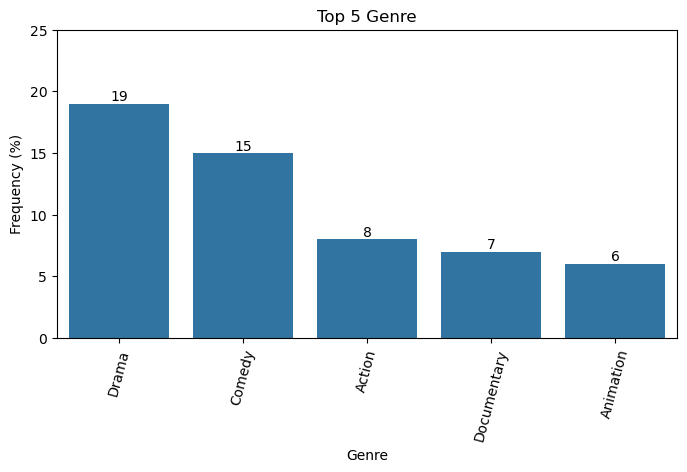

In [66]:
# Visualizing the top 5 genre
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(x = top_genre.index, y = top_genre)
ax.set(title = "Top 5 Genre",
      xlabel = "Genre",
      ylabel = "Frequency (%)")
ax.set_ylim((0, 25))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 75);

***Drama was the highest genre at 19%, this is follwed by comedy (15%), action (8%), crime (7%) and animation (6%)***

### 4. Top 10 Movies with higest revenues

In [67]:
# Extracting Longest Movies
movies_revenues = data[["Movies", "Gross($)"]].sort_values(by = "Gross($)", ascending = False).reset_index(drop = True)

# Extracting top 10 longest movies
highest_revenue = movies_revenues.head(10)
highest_revenue = highest_revenue.copy()

# Dividing by 1 million
highest_revenue["Gross($)"] = highest_revenue["Gross($)"] / 1_000_000

highest_revenue

,Movies,Gross($)
0,Beauty and the Beast,504.01
1,Poldark,504.01
2,Spirit Untamed,504.01
3,iZombie,504.01
4,Freaks and Geeks,504.01
5,The SpongeBob Movie: Sponge on the Run,486.30
6,Finding Dory,486.30
7,Captain America: Civil War,408.08
8,Jumanji: Welcome to the Jungle,404.52
9,Spider-Man,403.71


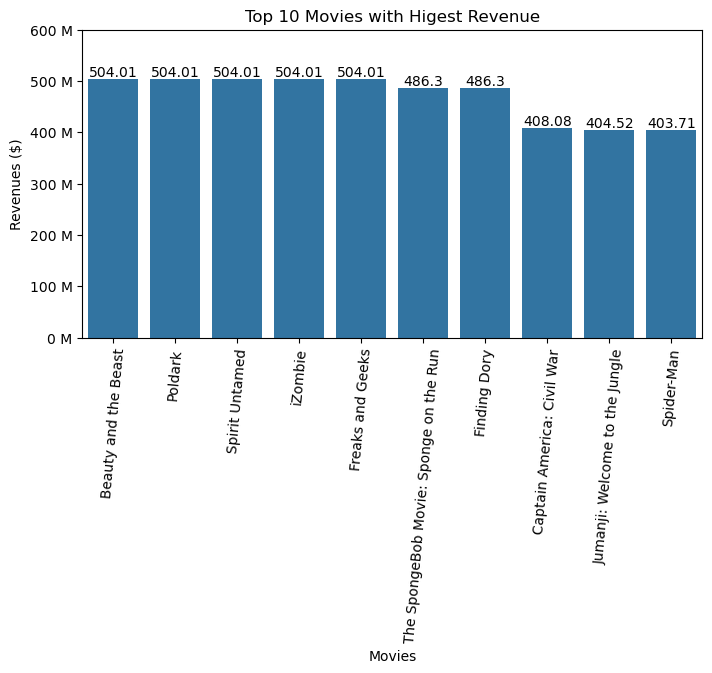

In [68]:
# Visualizing the top 10 movies with highest revenue
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(x = highest_revenue["Movies"], y = highest_revenue["Gross($)"])
ax.set(title = "Top 10 Movies with Higest Revenue",
      xlabel = "Movies",
      ylabel = "Revenues ($)")
ax.set_ylim((0, 600))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 85)
plt.yticks([0, 100, 200, 300, 400, 500, 600], 
          ["0 M","100 M", "200 M", "300 M", "400 M", "500 M", "600 M"]);

***Freaks and Geeks, iZombie, Spirit Untamed, Beauty and the Beast and Poldark are the movies with the highest revenue***

### 5. Movies with higest Ratings

In [69]:
# Extracting highest rated Movies
movies_rating = data[["Movies", "Rating"]].sort_values(by = "Rating", ascending = False)

# Extracting top 10 rated movies
highest_rating = movies_rating.head(10)

# Displaying the rated movies
highest_rating

,Movies,Rating
16,Breaking Bad,9.4
3956,Stranger Things: Spotlight,9.4
129,Avatar: The Last Airbender,9.3
820,Cosmos: A Spacetime Odyssey,9.3
1184,Our Planet,9.3
3820,CM101MMXI Fundamentals,9.2
3,Rick and Morty,9.2
913,Kota Factory,9.2
1681,Kotaro Lives Alone,9.2
104,Sherlock,9.1


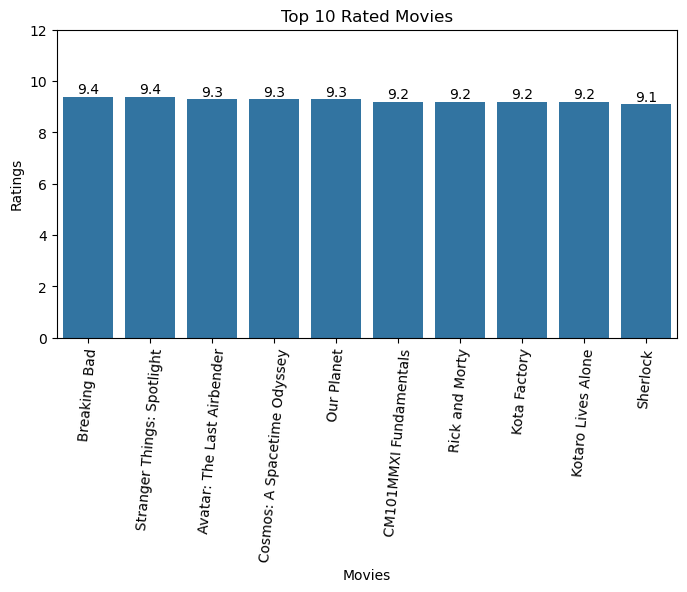

In [70]:
# Visualizing the top rated movies
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(x = highest_rating["Movies"], y = highest_rating["Rating"])
ax.set(title = "Top 10 Rated Movies",
      xlabel = "Movies",
      ylabel = "Ratings")
ax.set_ylim((0, 12))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 85);

***"Breaking Bad" and "Stranger Things: Spotlight" is the movie with the highest rating***

### 6. Movies with Highest Votes

In [71]:
# Extracting highest rated Movies
movies_votes = data[["Movies", "Votes"]].sort_values(by = "Votes", ascending = False)

# Extracting top 10 rated movies
highest_votes = movies_votes.head(10)

# Displaying the rated movies
highest_votes

,Movies,Votes
111,The Lord of the Rings: The Fellowship of the Ring,1713028
193,The Lord of the Rings: The Return of the King,1691777
16,Breaking Bad,1552311
260,The Lord of the Rings: The Two Towers,1529752
132,The Departed,1227522
156,Kill Bill: Vol. 1,1034554
85,Jurassic Park,897444
143,Gone Girl,895888
19,Stranger Things,885856
2,The Walking Dead,885805


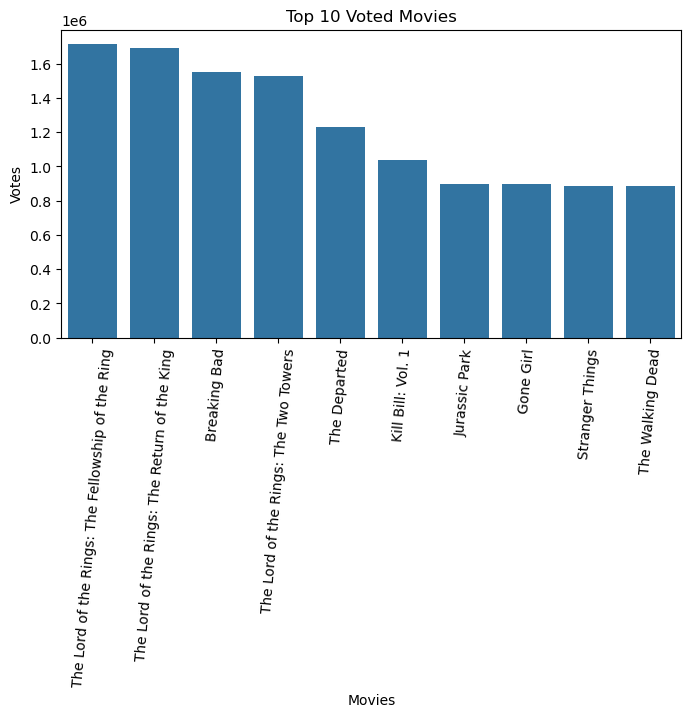

In [72]:
# Visualizing the top 10 voted movies
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(x = highest_votes["Movies"], y = highest_votes["Votes"])
ax.set(title = "Top 10 Voted Movies",
      xlabel = "Movies",
      ylabel = "Votes")
plt.xticks(rotation = 85);

***The Lord of Rings is the first, second and the fourth movie with the highest votes  with Breaking Bad being the movie with the third highest votes.***

### 7. Comparing Ratings and Votes

In [73]:
# Function for comparing two numerical variables
def compare_values(col1, col2, df = data):
    # Visualizing the data
    plt.figure(figsize = (8, 4))
    plt.scatter(x = df[col1], y = df[col2])
    plt.title(f"Scatterplot of {col1} and {col2}")
    plt.xlabel(f"{col1}")
    plt.ylabel(f"{col2}")
    plt.show()

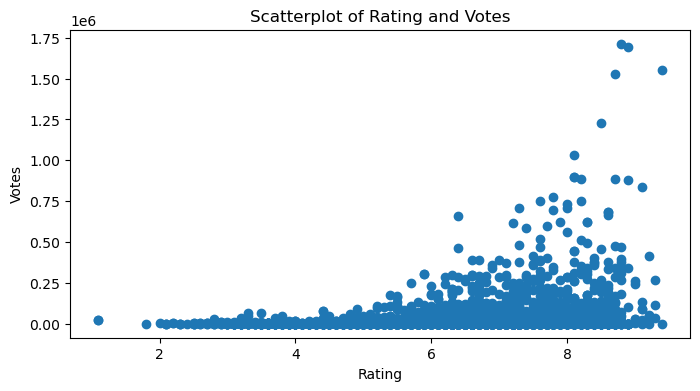

In [74]:
# Visualizing the comparison
compare_values("Rating", "Votes")

The distribution of the votes column as we saw from the descriptive statistics of our data is so wide. This may have account for the nature of this distribution. To better understand it, we'll scale the votes column using log

In [75]:
# Extracting the two columns
votes_rating = data[["Rating", "Votes"]]

votes_rating = votes_rating.copy()

# Scaling the votes columns using log
votes_rating["Votes"] = np.log(votes_rating["Votes"])

# viewing data
votes_rating.head()

,Rating,Votes
0,6.1,9.955226
1,5.0,9.790879
2,8.2,13.694252
3,9.2,12.935670
4,7.6,10.160375


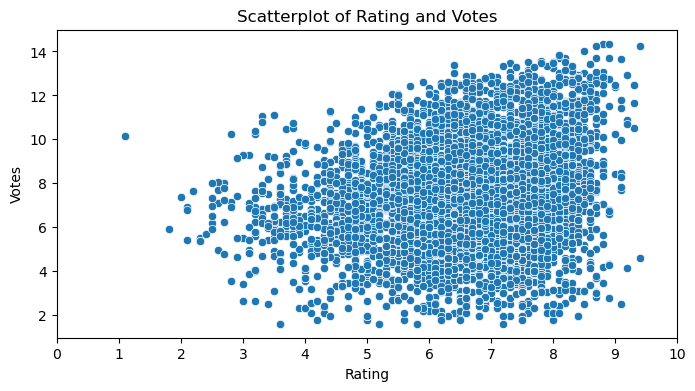

In [76]:
# Visualizing the comparison
plt.figure(figsize = (8,4))

sns.scatterplot(x = "Rating", y = "Votes", data = votes_rating)
plt.title("Scatterplot of Rating and Votes")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.xticks(np.arange(0, 11, 1));

***From the scatterplot above we can see that movies with higher ratings tend to have higher votes. But this relationship is a weak one.***

### 8. Comparing  Votes and Gross

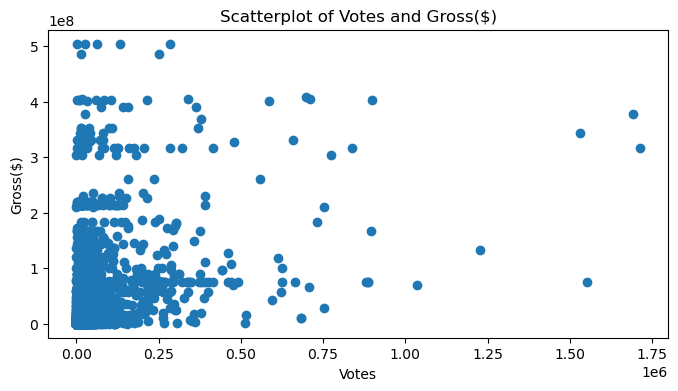

In [77]:
# Visualizing the comparison
compare_values("Votes", "Gross($)")

From the scatterplot, we see that there are zero gross values, and the distribution of the values is so wide. 

In [78]:
# Checking descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,6423.0,6.569080e+00,1.221651e+00,1.1,5.8,6.7,7.4,9.4
Votes,6423.0,1.946892e+04,7.913317e+04,5.0,291.5,1357.0,6349.5,1713028.0
RunTime(mins),6423.0,7.941632e+01,4.793773e+01,1.0,49.0,84.0,100.0,853.0
Gross($),6423.0,1.716489e+07,5.138697e+07,0.0,20000.0,150000.0,4560000.0,504010000.0
ReleaseYear,6423.0,2.015307e+03,8.176381e+00,1932.0,2014.0,2017.0,2019.0,2023.0


From the above table we can see that there are movies with a 0 Gross value. We'll remove rows with Gross value of 0. 

Secondly, The minimum and maximum values of these two columns is soo wide, as such we'll scale the data using log before plotting. 

In [79]:
# Removing values with 0 revenue
no_zero = data[data["Gross($)"] != 0.0]

# Getting the log to normalize the values
no_zero_log = np.log(no_zero[["Gross($)", "Votes"]])

no_zero_log.head(2)

,Gross($),Votes
0,18.139246,9.955226
1,18.139246,9.790879


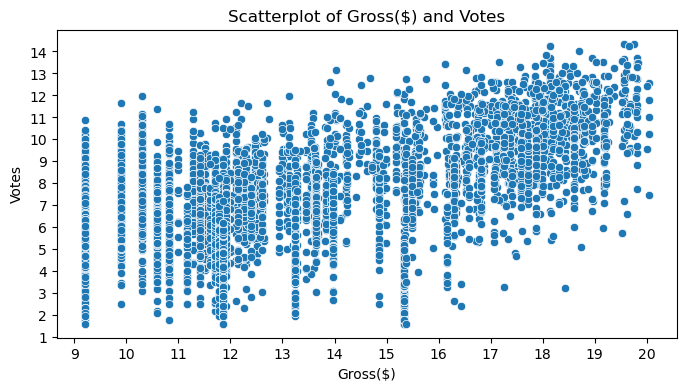

In [80]:
# Visualizing the comparison
plt.figure(figsize = (8,4))

sns.scatterplot(x = "Gross($)", y = "Votes", data = no_zero_log)
plt.title("Scatterplot of Gross($) and Votes")
plt.xlabel("Gross($)")
plt.ylabel("Votes");
plt.xticks(np.arange(9, 21, 1))
plt.yticks(np.arange(1, 15, 1));

***From the scatterplot above, we can see that movies with higher votes tends to have higher gross revenue***

### 9. Comparing RunTime and Ratings

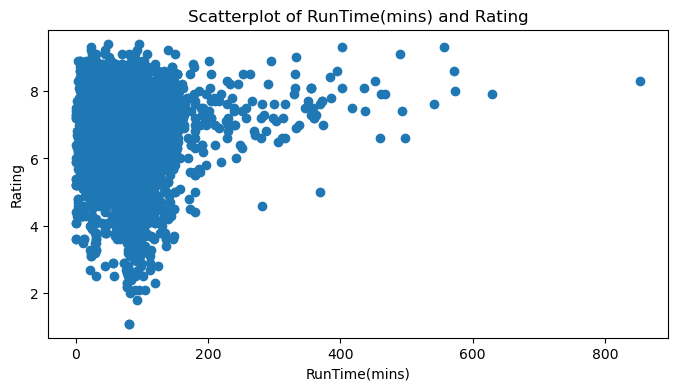

In [81]:
# Visualizing the comparison
compare_values("RunTime(mins)","Rating")

From the scatterplot above we see that most of the movies are between 1 mins to 200 mins. As such we'll scale the column before replotting it. 

In [82]:
# Extracting the two columns
runtime_rating = data[["Rating", "RunTime(mins)"]]

runtime_rating = runtime_rating.copy()

# Scaling the runtime columns using log
runtime_rating["RunTime(mins)"] = np.log(runtime_rating["RunTime(mins)"])

# viewing data
runtime_rating.head(2)

,Rating,RunTime(mins)
0,6.1,4.795791
1,5.0,3.218876


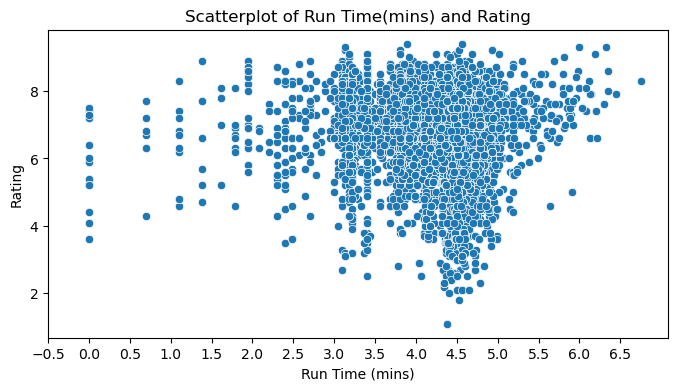

In [83]:
# Visualizing the comparison
plt.figure(figsize = (8, 4))

sns.scatterplot(x = "RunTime(mins)", y = "Rating", data = runtime_rating)
plt.title("Scatterplot of Run Time(mins) and Rating")
plt.xlabel("Run Time (mins)")
plt.ylabel("Rating")
plt.xticks(np.arange(-0.5, 7, 0.5));

***There's no significant relationship seen from above relationship***

### 10. Average Rating over years

In [84]:
# Function to calulate average values over years
def values_over_year(col1, col2 = "ReleaseYear", df = data):
    # Getting the average values per each year
    average = df.groupby(col2)[col1].mean().reset_index()
    
    # Plotting the average values over year
    plt.figure(figsize= (15,6))

    sns.lineplot(x = col2, y = col1, data = average, marker = "o", errorbar=None)
    plt.title(f"Average {col1} Over Years")
    plt.xlabel("Release Year")
    plt.ylabel(f"Average {col1}");

In [85]:
# Function to zoom in on 2000 and above
year_2000 = data[data["ReleaseYear"] >= 2000]
def values_after_2000(col1, col2 = "ReleaseYear", df = year_2000):
    average = df.groupby(col2)[col1].mean().reset_index()
    
    # Plotting the average values over year
    plt.figure(figsize= (10,4))

    sns.lineplot(x = col2, y = col1, data = average, marker = "o", errorbar=None)
    plt.title(f"Average {col1} From Year 2000")
    plt.xlabel("Release Year From 2000")
    plt.ylabel(f"Average {col1}")
    plt.xticks(np.arange(1999, 2025, 1), rotation = 90);

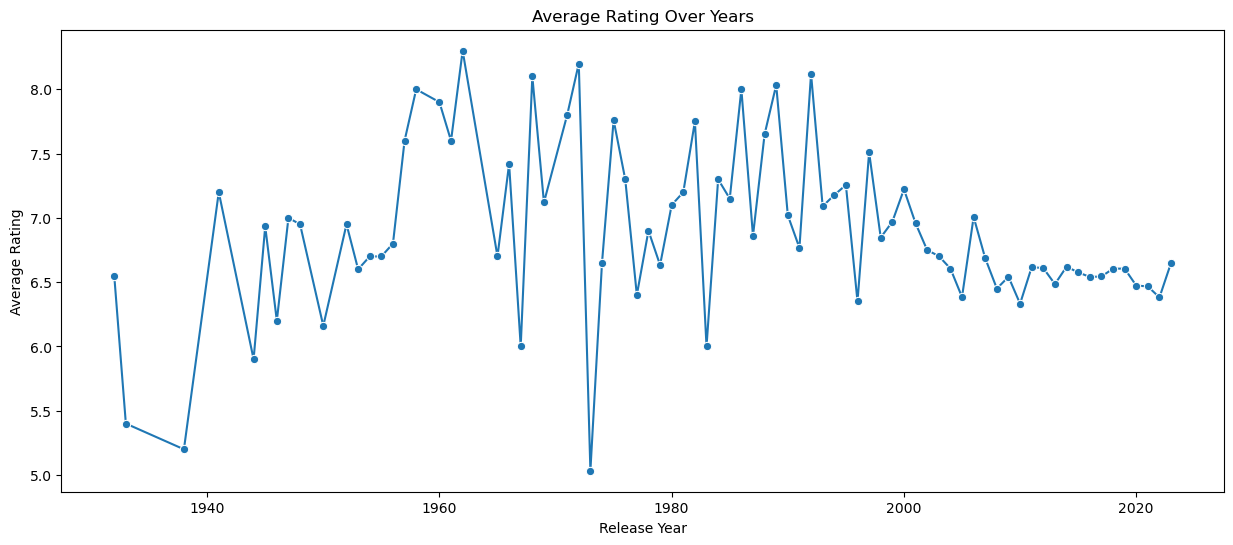

In [86]:
# Visualizing average rating over each year
values_over_year("Rating")

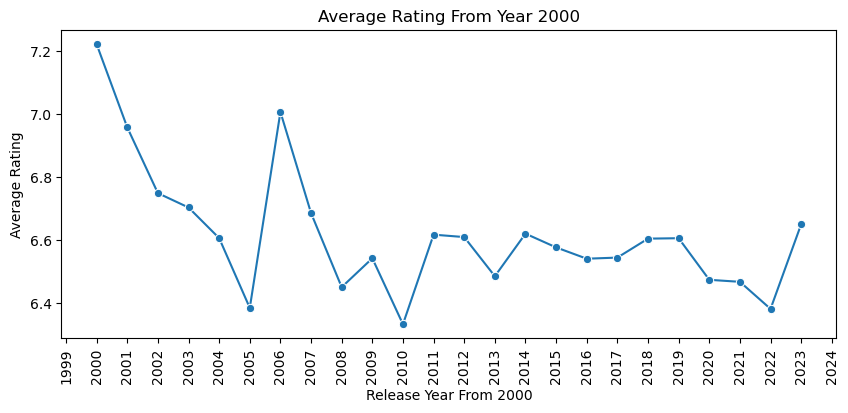

In [87]:
# Comparing Average rating from year 2000
values_after_2000("Rating")

***From the line chart, we see that rating from 1940 to 1960 were quite high. But there was a spike down around 1970. Compared to the previous century, there's drop in average rating from 2000, average rating peaking at 2001 and 2006.*** 

### 11. Average Votes Over Years

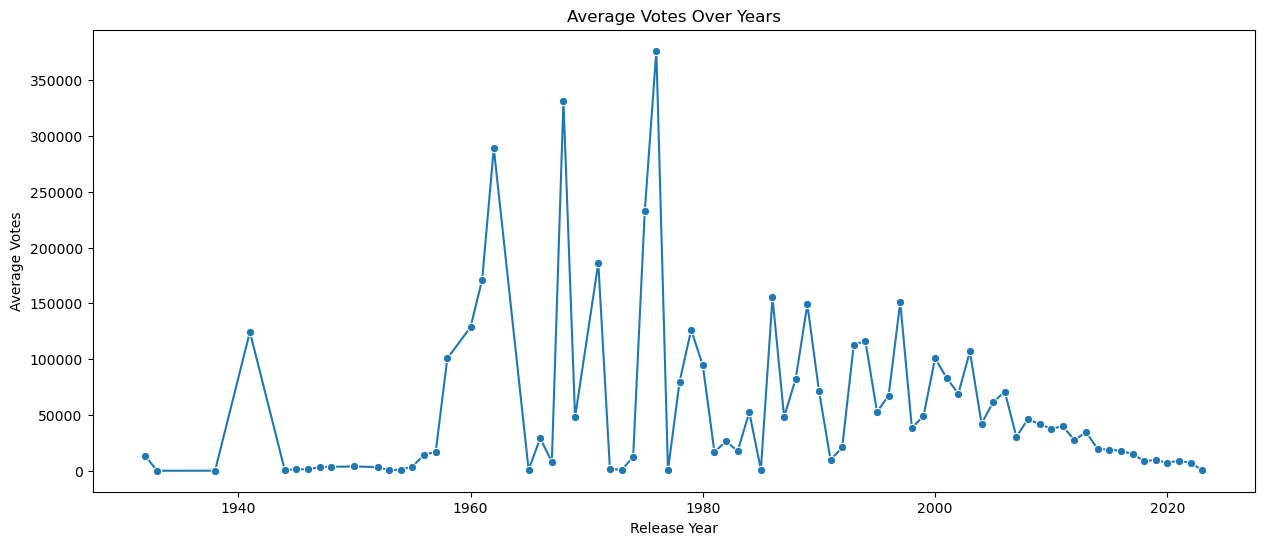

In [88]:
# Visualizing average votes over years
values_over_year("Votes")

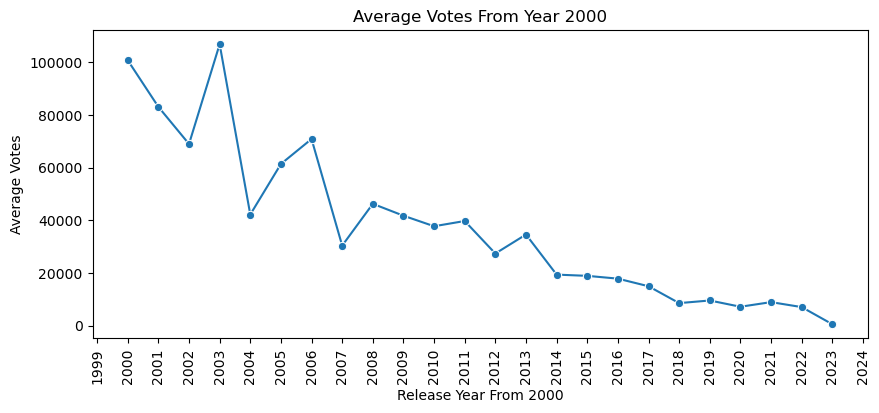

In [89]:
# Visualizing average votes from year 2000
values_after_2000("Votes")

***Like the rating, there's a significant drop in average votes from the year 2000. While before 2000, it was fluctuating unsteadily.***

### 12. Average Gross Over Years

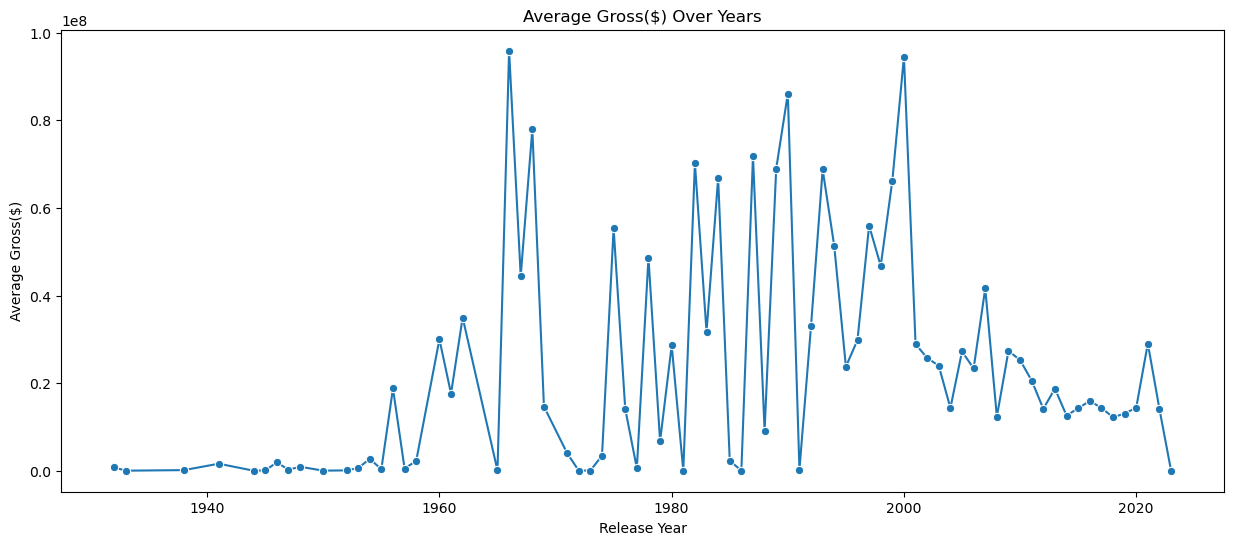

In [90]:
# Visualizing Gross over years
values_over_year("Gross($)")

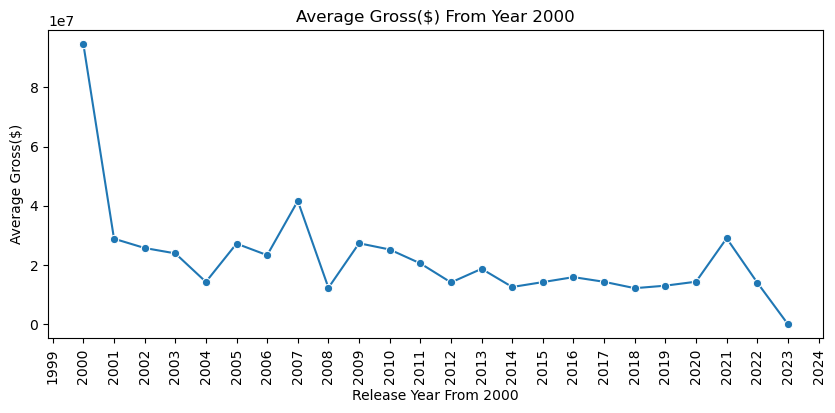

In [91]:
# Visualizing average Gross from year 2000
values_after_2000("Gross($)")

***There's drop in average gross from 2000***

### 13. Average Gross by MovieType

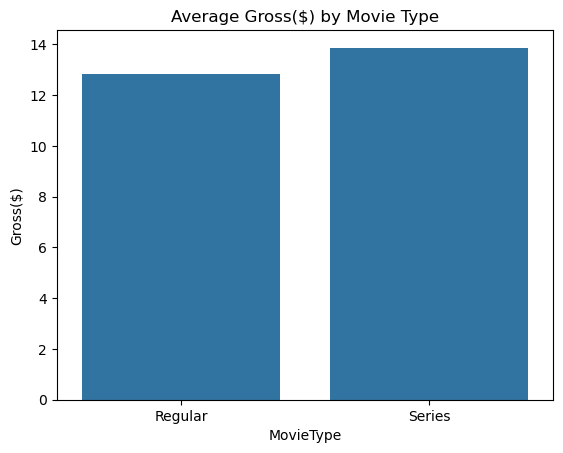

In [92]:
# Removing values with 0 revenue
no_zero = data[data["Gross($)"] != 0.0]
no_zero = no_zero.copy()

# Getting the log to normalize the values
no_zero["Gross($)"] = np.log(no_zero["Gross($)"])
values = no_zero[["MovieType","Gross($)"]]

# Visualizing average gross based on movie_type 
movies_type = values.groupby("MovieType")["Gross($)"].mean().reset_index()
sns.barplot(x = "MovieType", y = "Gross($)", data = movies_type)
plt.title("Average Gross($) by Movie Type");

***On average, movies that are series have a higher gross revenue than movies that are regular.***

### Reordering the Columns

In [93]:
data.columns

Index(['Movies', 'Genre', 'Rating', 'Votes', 'RunTime(mins)', 'Gross($)',
       'ReleaseYear', 'MovieType', 'StarsDirectors'],
      dtype='object')

In [94]:
# Stating the new order
order = ['Movies', 'ReleaseYear', 'Genre', 'MovieType', 'Rating', 'StarsDirectors', 'Votes', 'RunTime(mins)', 'Gross($)']

# Rearranging the dataframe columns
data = data[order]

# Displaying first five values
data.head()

,Movies,ReleaseYear,Genre,MovieType,Rating,StarsDirectors,Votes,RunTime(mins),Gross($)
0,Blood Red Sky,2021,"Action,Horror,Thriller",Regular,6.1,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062,121,75470000.0
1,Masters of the Universe: Revelation,2021,"Animation,Action,Adventure",Series,5.0,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870,25,75470000.0
2,The Walking Dead,2010,"Drama,Horror,Thriller",Series,8.2,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805,44,75470000.0
3,Rick and Morty,2013,"Animation,Adventure,Comedy",Series,9.2,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849,23,75470000.0
4,Army of Thieves,2021,"Action,Crime,Horror",Regular,7.6,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",25858,50,75470000.0


### Saving and Loading Saved DataSet

In [95]:
# Saving Dataset
data.to_csv("movies_capstone.csv", index = False)

In [96]:
# Loaind Dataset
test = pd.read_csv("movies_capstone.csv")

test.head()

,Movies,ReleaseYear,Genre,MovieType,Rating,StarsDirectors,Votes,RunTime(mins),Gross($)
0,Blood Red Sky,2021,"Action,Horror,Thriller",Regular,6.1,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062,121,75470000.0
1,Masters of the Universe: Revelation,2021,"Animation,Action,Adventure",Series,5.0,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870,25,75470000.0
2,The Walking Dead,2010,"Drama,Horror,Thriller",Series,8.2,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805,44,75470000.0
3,Rick and Morty,2013,"Animation,Adventure,Comedy",Series,9.2,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849,23,75470000.0
4,Army of Thieves,2021,"Action,Crime,Horror",Regular,7.6,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",25858,50,75470000.0
